## Project Desciption 

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From above we see that there are 907 rows and 27 columns from which we will take primary fuel and capacity_mw as target variable one after the another

By looking at the primary_fuel column, we can see that it contains categorical data and hence will be a Classification Problem.

And, as the capacity_mw column contains continuous data we can confirm that it will be a Regression Problem.


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

As we can see that there are many columns with null values so we will drop the columns if the null values present around 50%(453) of the total values (907).

In [4]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017","generation_gwh_2018",
        "generation_gwh_2019","generation_data_source", "estimated_generation_gwh"], axis=1,inplace=True)

In [5]:
df.shape

(907, 13)

Now the columns have been reduced from 27 to 13.

In [6]:
df.nunique()

country                    1
country_long               1
name                     907
gppd_idnr                907
capacity_mw              361
latitude                 836
longitude                827
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
dtype: int64

As we can see that Country, Country_long and year_of_capacity_data have only 1 unique value so these columns wont provide much insight and wont be useful for our prediciton, so we will drop them.

We can also see that Name and gppd_idnr columns have each value as a unique value so that wont be useful for our prediction as well so we will drop them too.

Also, we see that there is a column "url" which basically holds web document links and values such as those or descriptions do not really help in machine learning models and we will be deleteing it too.


In [7]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"],axis=1,inplace=True)

In [8]:
df.shape

(907, 7)

We see now that there are only 7 columns present which will be useful for our prediction. Now we will treat the null values with mean for float datatype and mode method for object datatype.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            861 non-null    float64
 2   longitude           861 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  527 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  888 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


In [10]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [11]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

The null values have been treated.

In [12]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year
count,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267
std,590.085456,6.079148,4.812291,15.734928
min,0.000000,8.168900,68.644700,1927.000000
25%,16.725000,17.072000,74.388900,1998.000000
50%,59.200000,21.281800,76.979200,2014.000000
75%,385.250000,25.176450,79.206100,2015.000000
max,4760.000000,34.649000,95.408000,2018.000000


From above details we can notice the following-
1) There is skewness present in capacity_mw and commissioning year as the mean and median values (50%) have a noticeable difference.
2) There maybe some outliers present as the 75% vales and maximum values have a huge gap between them.
3) We can also see the mean and standard deviation of each of the column.

Now we will use describe function for object datatype.

In [13]:
df.describe(exclude='float')

,primary_fuel,source,geolocation_source
count,907,907,907
unique,8,191,3
top,Coal,Central Electricity Authority,WRI
freq,258,519,784


From above details we can notice the following-
1) Number of unique values for each column.
2) Most frequent value occuring in each column. (mode)
3) Frequency of the most occuring value.

## Visualisation

### Univariate Analysis

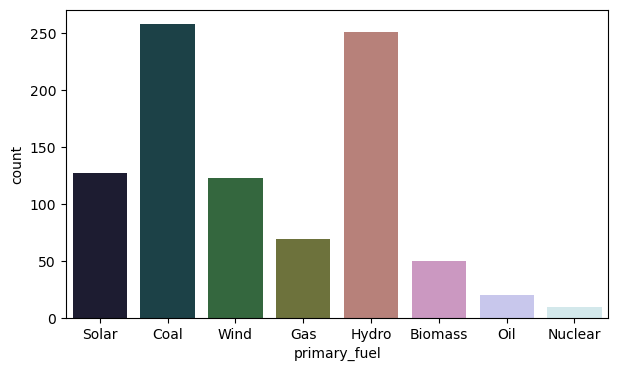

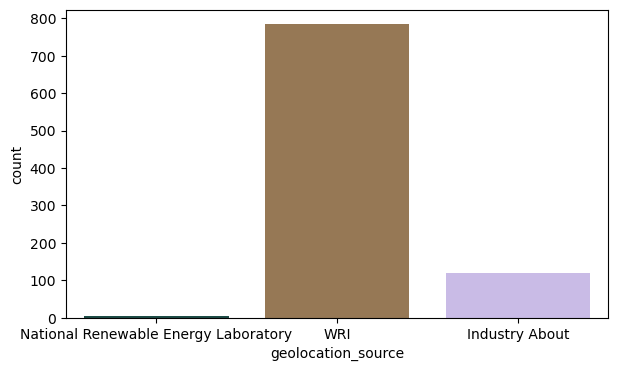

In [14]:
categorical=['primary_fuel','geolocation_source']
for i in categorical:
    pt.figure(figsize=(7,4))
    sb.countplot(x=df[i],palette='cubehelix')
    pt.show()

In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

However when we will be considering "primary_fuel" as our target label then this is impose a class imbalance issue while trying to create a classification model and therefore will need to be treated accordingly using SMOTE.


In the second count plot for "geolocation_source" column we see that the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.

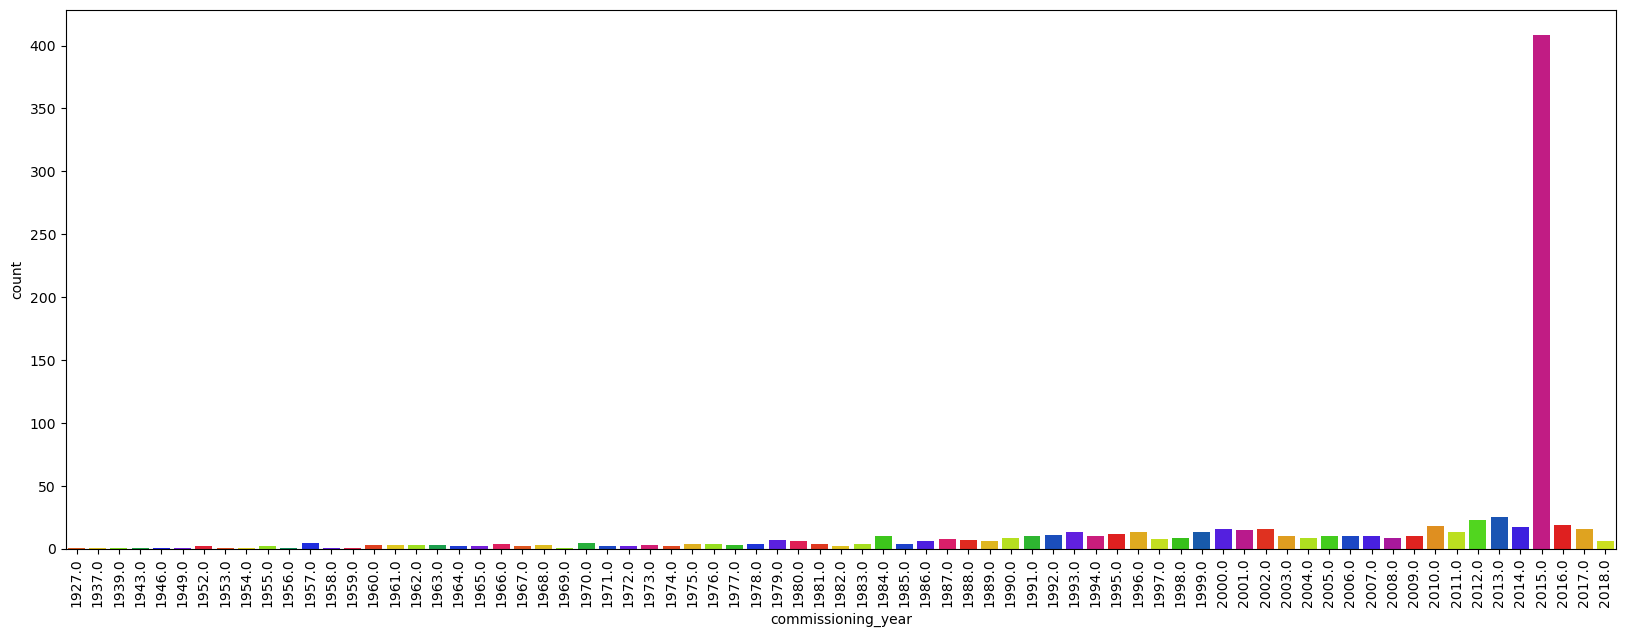

In [25]:
pt.figure(figsize=(20,7))
sb.countplot(x=df['commissioning_year'],palette='prism')
pt.xticks(rotation=90)
pt.show()

In the above count plot we can see the list of years as to when the power plant data was comissioned. Since we had missing values in the this column we replaced it with the mode wherein the year 1954 covered the most rows in our dataset compared to all the other years.

In [30]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print("Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print("Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


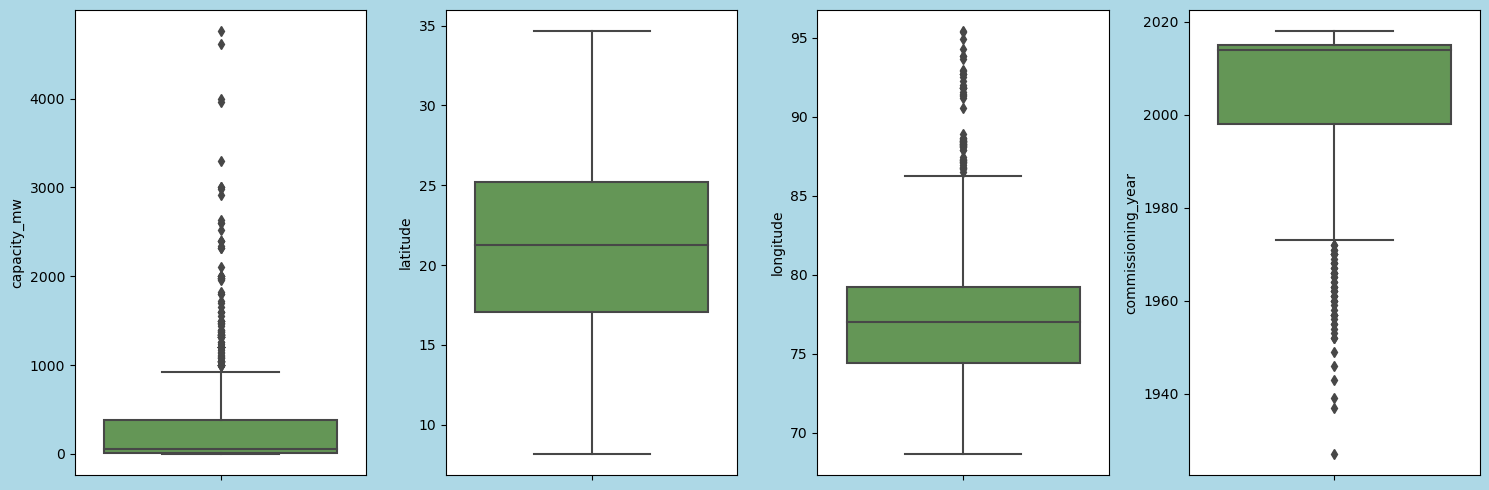

In [32]:
fig, ax = pt.subplots(ncols=4, nrows=1, figsize=(15,5),facecolor='lightblue')
index = 0
for col, value in df[float_datatype].items():
    sb.boxplot(y=col, data=df, ax=ax[index], palette="gist_earth")
    index += 1
pt.tight_layout()
pt.show()

In the above box plot we can see presence of outliers in our numerical columns that will need to be checked before we start building any machine learning model.

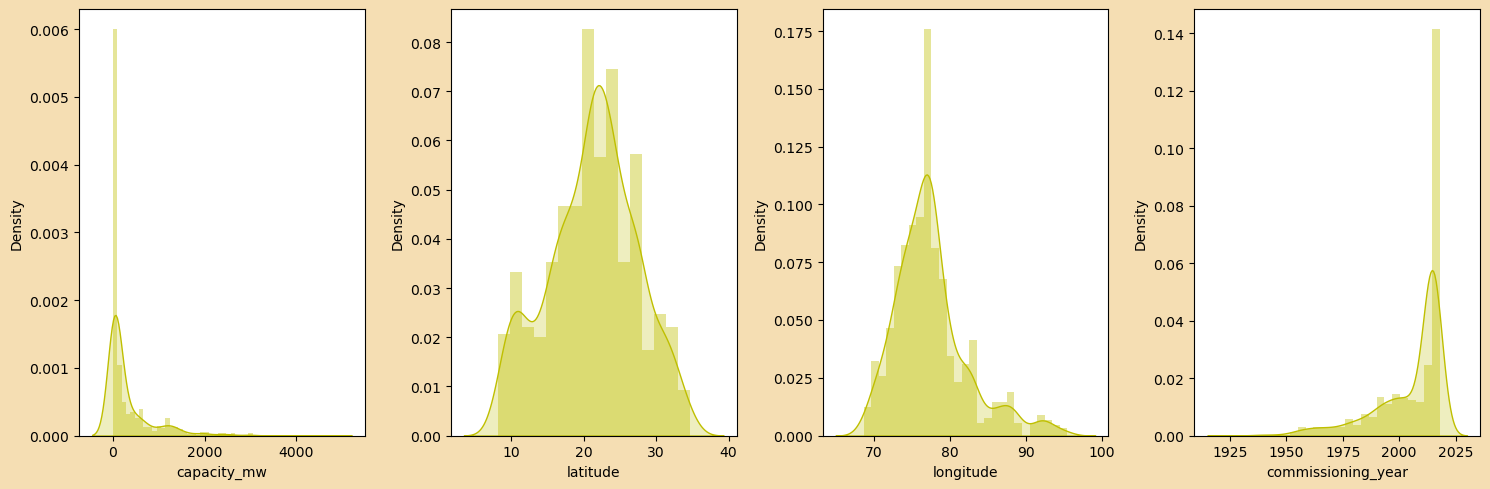

In [35]:
fig, ax = pt.subplots(ncols=4, nrows=1, figsize=(15,5),facecolor='wheat')
index = 0
for col, value in df[float_datatype].items():
    sb.distplot(value, ax=ax[index], color="y", kde_kws={"shade": True})
    index += 1
pt.tight_layout()
pt.show()

In the above distribution plot created for our numerical data columns we see skewness and that will need to be treated before we can proceed with our model building process.

### Bivariate Analysis

<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

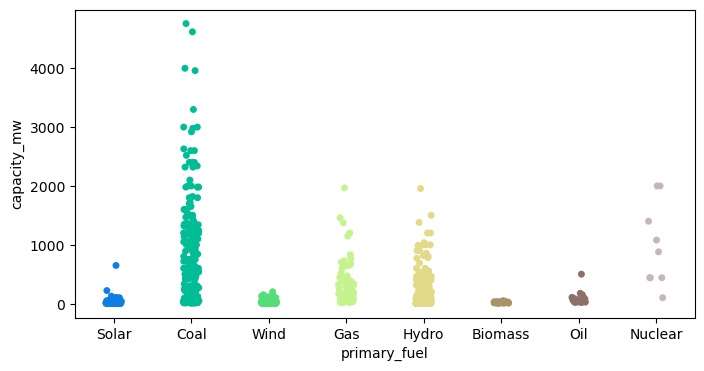

In [80]:
pt.figure(figsize=(8,4))
sb.stripplot(x = "primary_fuel", y = "capacity_mw", data = df,palette='terrain')

In the above categorical plot we can see that coal is being used to generate electricity and biomass is used the least.

<Axes: xlabel='commissioning_year', ylabel='capacity_mw'>

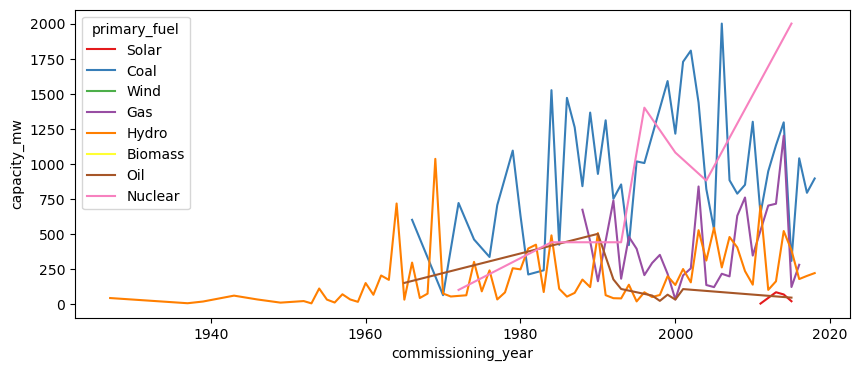

In [105]:
pt.figure(figsize=(10,4))
sb.lineplot(x = "commissioning_year", y = "capacity_mw", data = df,hue='primary_fuel',err_style=None,palette='Set1')

From above plot we can see that electricity generated in was pretty low in older times as compared to recent years which shows technical progress.We can also see when each of the source of fuel came into existence.
For example- Hydro fuel is the oldest source of fuel and solar fuel has just came into existence and is the latest source of fuel.

<Axes: xlabel='primary_fuel', ylabel='longitude'>

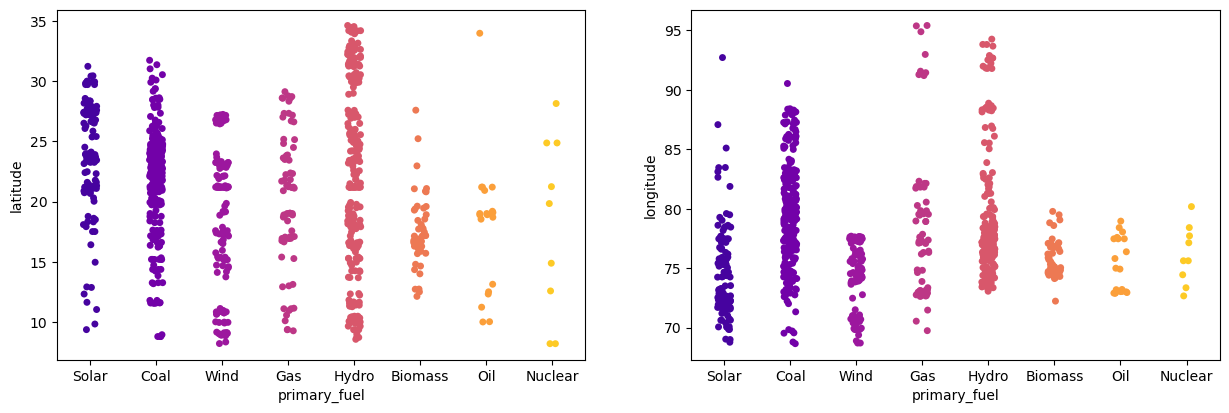

In [78]:
pt.figure(figsize=(15,10))
pt.subplot(221)
sb.stripplot(x = "primary_fuel", y = "latitude", data = df,palette='plasma')
pt.subplot(222)
sb.stripplot(x = "primary_fuel", y = "longitude", data = df,palette='plasma')

In the left strip plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.

In the right strip plot we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type.

For multivariate analyis (heatmap and pairplot) we will encode the categorical columns first.

## Encoding 

In [106]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


### Multivariate Analysis


<Axes: >

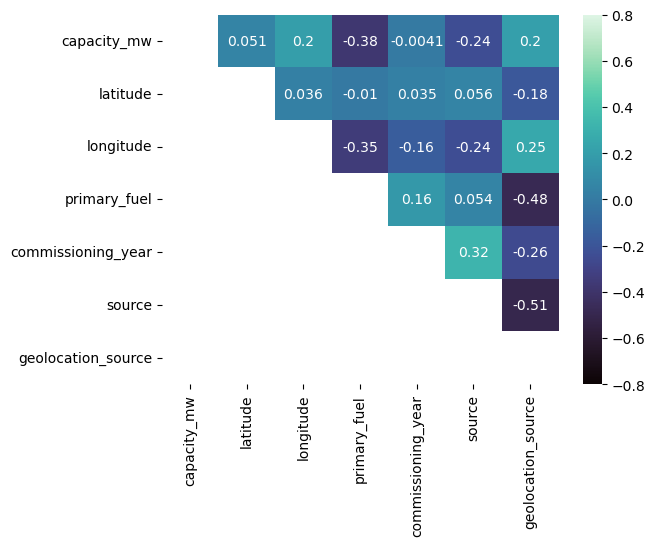

In [118]:
sb.heatmap(df.corr(),mask=np.tril(df.corr()),cmap='mako',vmin=-0.8,vmax=0.8,annot=True)

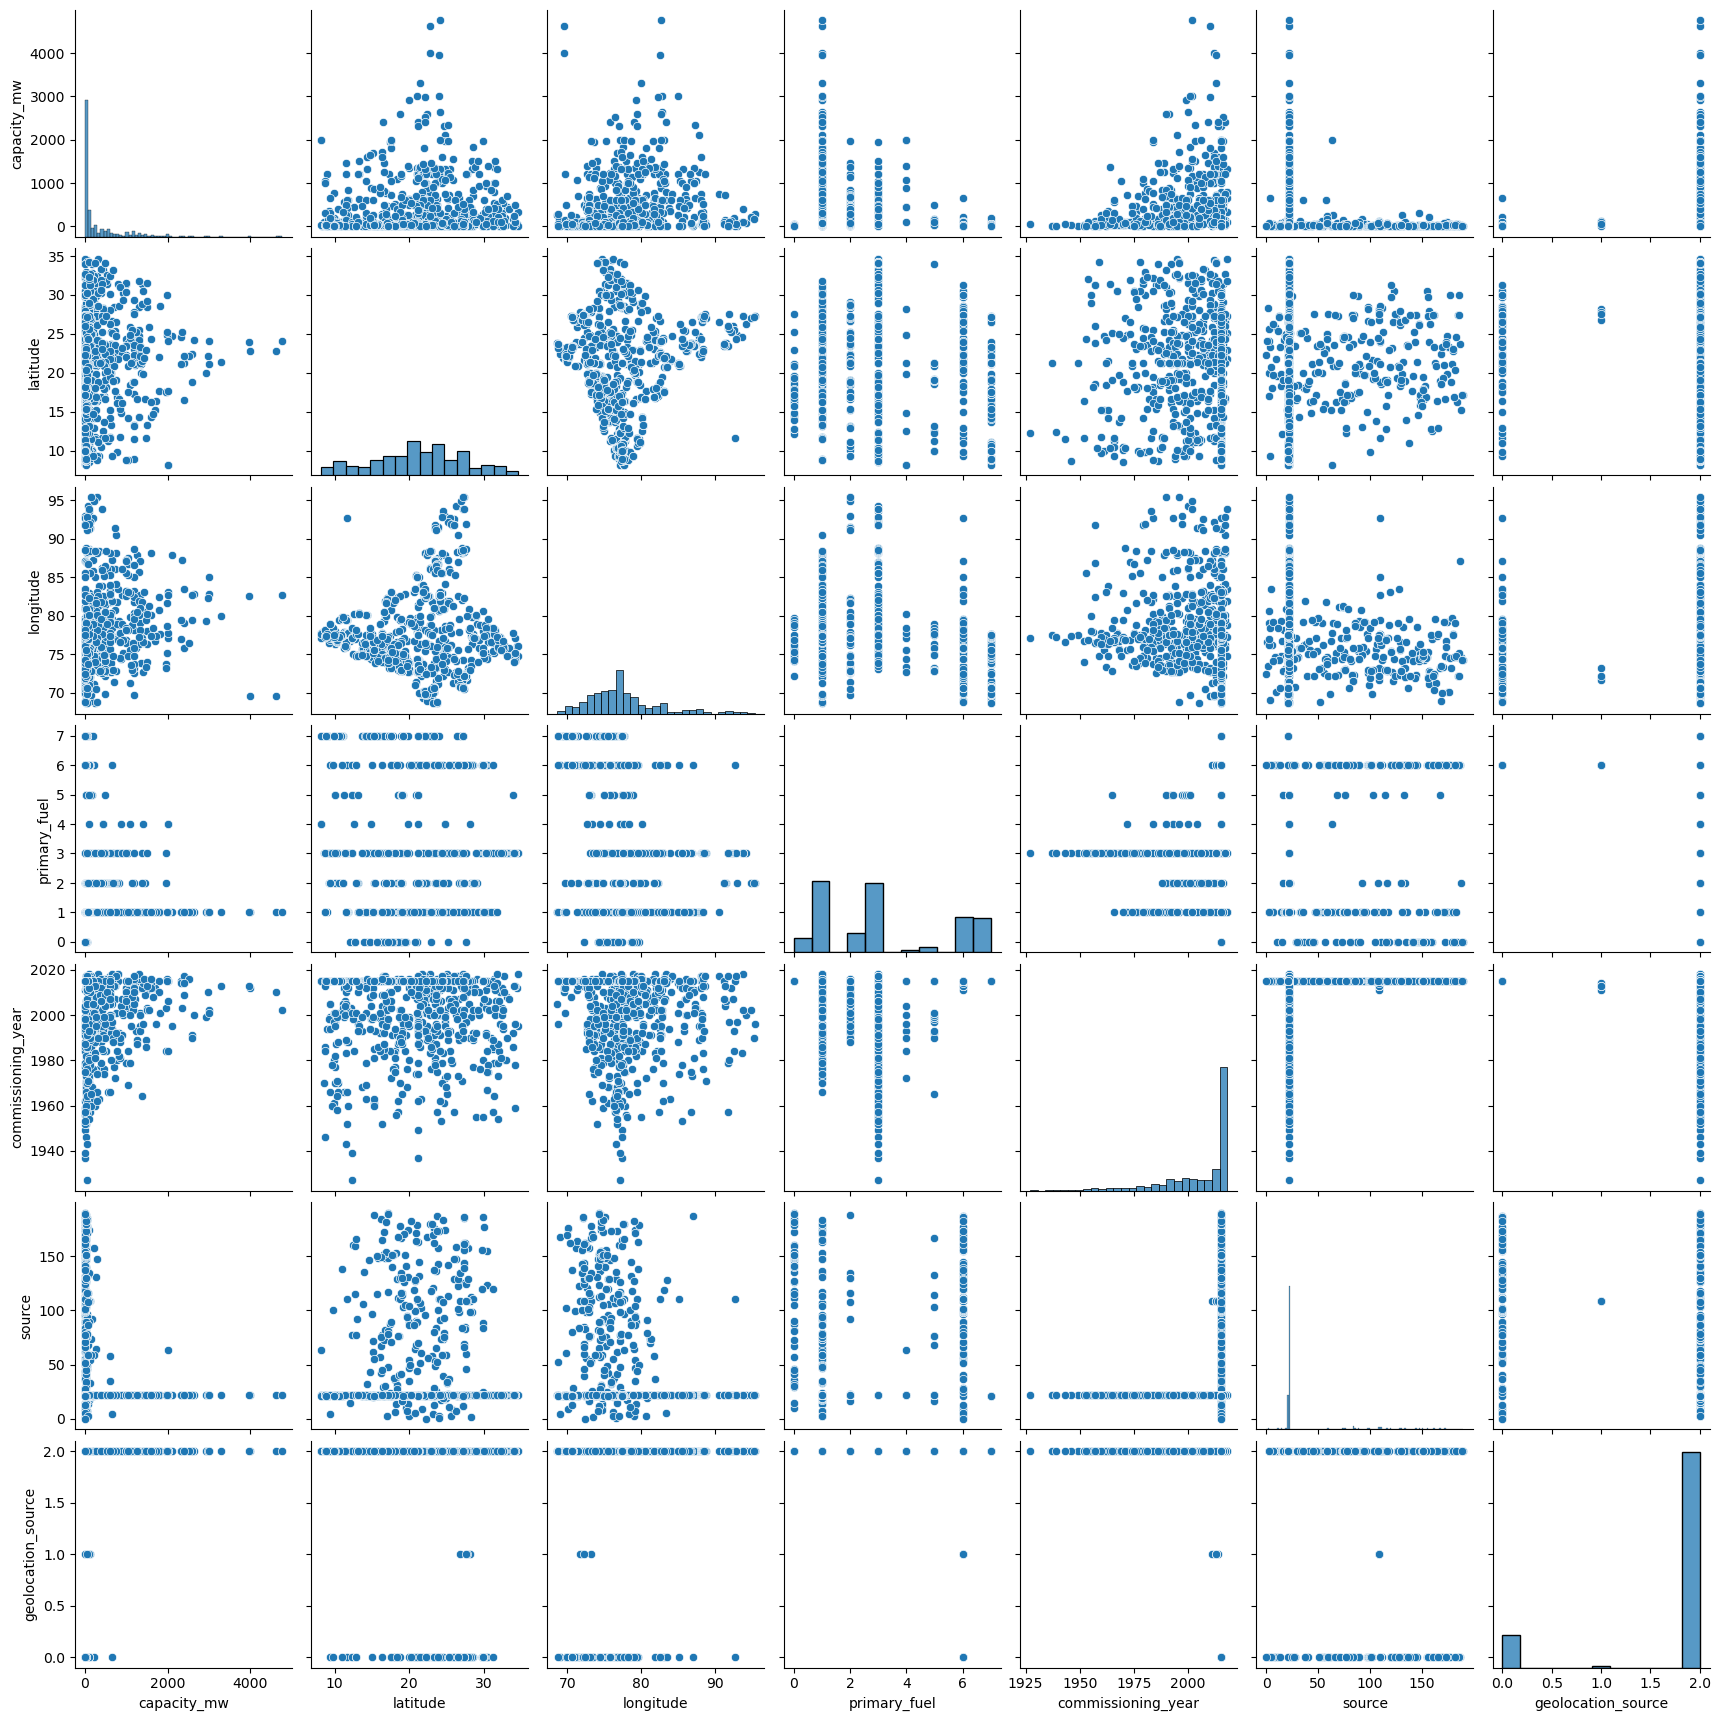

In [119]:
sb.pairplot(df)

## Removing Outliers using Z-Score

In [140]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (907, 7)
Shape of the dataframe after removing outliers:  (838, 7)
Percentage of data loss post outlier removal:  7.6074972436604185


## Removing skewness using log method

In [127]:
df1.skew()

capacity_mw           1.967086
latitude             -0.112601
longitude             0.903442
primary_fuel          0.418559
commissioning_year   -1.500521
source                1.792245
geolocation_source   -2.112259
dtype: float64

As the acceptance range for skewness is around -0.5 to 0.5, we will remove skewness from those columns where the value is more than that, which are capacity_mw and commissioning year.

In [138]:
df1['capacity_mw']=np.log1p(df1['capacity_mw'])
df1['commissioning_year']=np.log1p(df1['commissioning_year'])

## Standard Scaling

First splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label.

In [142]:
X = df1.drop('primary_fuel', axis=1)
Y = df1['primary_fuel']

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-0.632859,1.155327,-0.891634,0.384586,1.578700,-1.059632
1,-0.414086,0.598448,-0.573988,0.671188,3.125148,0.400848
2,-0.548786,0.132019,-1.789462,0.671188,-0.514953,0.400848
3,-0.329326,0.452596,3.314750,-0.116966,-0.491161,0.400848
4,3.484889,0.141226,1.236781,0.671188,-0.491161,0.400848


## Finding multicollinearity using VIF

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif

,Features,vif
0,capacity_mw,1.152623
1,latitude,1.050280
2,longitude,1.150650
3,commissioning_year,1.142128
4,source,1.509293
5,geolocation_source,1.503196


As we can see there is no multicollinearity present as the acceptance range of VIF value is till 10.

## Balancing the data using SMOTE

In [187]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
Y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification machine learning model does not get biased towards one category.

## Finding best random state for building Classification Models

In [199]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [189]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [190]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9444444444444444 on Random State: 31


So the best random state is 31.

In [243]:
 x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .25, random_state=31)

## Models with their metrics

In [194]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,X,Y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*****************************************************************************')

 For GaussianNB()  Accuracy score is:  0.5512820512820513

 Confusion matrix: 
 [[66  0  0  0  0  0  0  0]
 [10  1  0 44  1  2  0  0]
 [ 0  0  1 48  0  4  0  0]
 [ 0  0  0 62  0  0  0  0]
 [ 0  1  0 46 10  0  0  0]
 [19  0  0 33  0  9  0  0]
 [ 0  0  0  0  0  2 53  0]
 [ 0  0  0  0  0  0  0 56]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.69      1.00      0.82        66
           1       0.50      0.02      0.03        58
           2       1.00      0.02      0.04        53
           3       0.27      1.00      0.42        62
           4       0.91      0.18      0.29        57
           5       0.53      0.15      0.23        61
           6       1.00      0.96      0.98        55
           7       1.00      1.00      1.00        56

    accuracy                           0.55       468
   macro avg       0.74      0.54      0.48       468
weighted avg       0.73      0.55      0.48       468

Cross Validation Score= 0

We can see that the best working model is the Random forest classifer

## Hyperparameter Tuning  

In [248]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
fmod_param = {'max_features':['auto','sqrt','log2'],
'criterion' : ["gini", "entropy"],
'max_depth': [80, 90, 100, 110],
'min_samples_leaf': [3, 4, 5],
'min_samples_split': [8, 10, 12],
'n_estimators': [100, 200, 300, 1000]}
gs=GridSearchCV(rfc,fmod_param,cv=5,scoring='accuracy')
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [250]:
final_model1=RandomForestClassifier(max_features='sqrt',criterion='gini',max_depth=80,min_samples_leaf= 3,
 min_samples_split= 8,
 n_estimators= 200)
final_model1.fit(x_train, y_train)
fmod_pred = final_model1.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 91.66666666666666


## Confusion Matrix

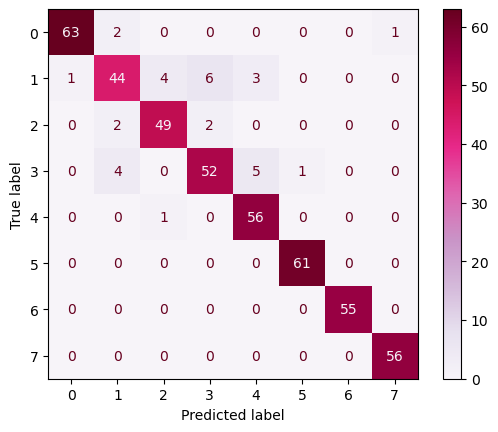

In [201]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, fmod_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='PuRd')

## Saving the classification model

In [177]:
import joblib
joblib.dump(final_model1,'Global_Power_plant_classification.obj')

['Global_Power_plant_classification.obj']

## Fitting the models for Regression Problem


In [180]:
y=df1['capacity_mw']
x1=df1.drop(columns=['capacity_mw'])
scaled_x1=scaler.fit_transform(x1) #scaling

In [181]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [182]:
models_reg=[LinearRegression(),Ridge(),Lasso(),SVR(),XGBRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor()]

In [183]:
maxAcc = 0
maxRS = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x1,y,test_size = .25, random_state=i)
    for m in models_reg:
        m.fit(x_train,y_train)
        pred = m.predict(x_test)
        acc = r2_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.6435575531875453 on Random State: 700


So the best random state is 700

In [251]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x1,y,test_size = .25, random_state=700)

## Every regression model with their metrics

In [205]:
for m in models_reg:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred))
    cvs=cross_val_score(m,x_train,y_train)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*****************************************************************************')

 For LinearRegression() 
R2 score : 0.2990045687334447
Mean absolute error:  227.36301929960104
Mean squared error:  110480.03768321298
Cross Validation Score= 0.22650931964255622 

*****************************************************************************
 For Ridge() 
R2 score : 0.29891437909247354
Mean absolute error:  227.31989822626713
Mean squared error:  110494.25197689979
Cross Validation Score= 0.22657737656135207 

*****************************************************************************
 For Lasso() 
R2 score : 0.2988581407091505
Mean absolute error:  227.35433747144776
Mean squared error:  110503.11539944385
Cross Validation Score= 0.22656493013356713 

*****************************************************************************
 For SVR() 
R2 score : -0.1815953527161569
Mean absolute error:  224.24119467441037
Mean squared error:  186224.75022201843
Cross Validation Score= -0.20498091525124829 

**********************************************************************

So our best model is Random Forest regressor

## Hyperparameter Tuning

In [280]:
rfr=RandomForestRegressor()
fmod_param = {'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1],
             'max_features':["sqrt","log2"]
             ,'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}
gs=GridSearchCV(rfr,fmod_param,cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'poisson',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 135}

In [300]:
final_model_reg=RandomForestRegressor(max_features='auto',criterion='poisson',max_depth=18,n_estimators=200,n_jobs=-1,random_state=135,min_samples_split=2)
final_model_reg.fit(x_train, y_train)
fmod_pred = final_model_reg.predict(x_test)
fmod_acc = (r2_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 62.88213886225134


## Plotting the best fit line

Text(0.5, 1.0, 'Best Fit Line')

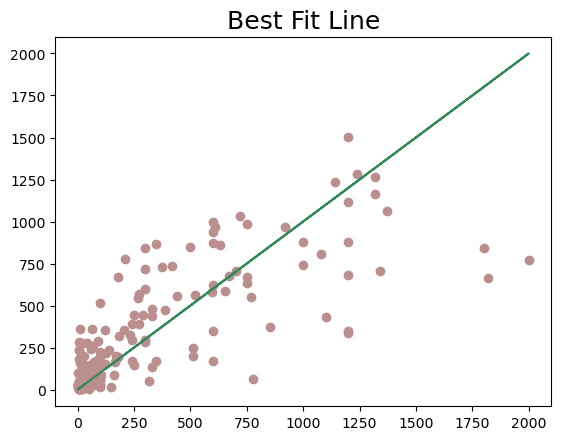

In [301]:
pt.scatter(x=y_test,y=fmod_pred,color='rosybrown')
pt.plot(y_test,y_test,color='seagreen')
pt.title('Best Fit Line',fontsize=18)

## Saving the model

In [302]:
filename = "Global_power_plant_reg.obj"
joblib.dump(final_model_reg, filename)

['Global_power_plant_reg.obj']